## **Data collection**

In [ ]:
pip install imbalanced-learn

###**Importing Libraries**

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import gc
from numpy import linalg
import math
import cvxopt
import cvxopt.solvers
from cvxopt import matrix
from cvxopt import solvers
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import statistics as state
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from joblib import Parallel, delayed
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from imblearn.metrics import gore
from sklearn.svm import SVCeometric_mean_sc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold

### **Importing Dataset**

In [ ]:
# data = pd.read_csv('/content/thyroid.csv')
data = pd.read_csv('/content/thyroid.csv')
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


### **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

In [ ]:
# shape of the dataset
data.shape

(3770, 30)

In [ ]:
# size of the dataset
data.size

113100

In [ ]:
# Viewing the dataset Columns
data.describe()

,Age,TSH,T3,T4,T4U,FTI,TBG
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,0.0
mean,51.724934,4.591025,1.603008,101.678462,0.892921,99.176844,NaN
std,20.097915,23.345886,1.097207,43.192637,0.354295,45.851205,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.250000,NaN
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000,NaN
75%,67.000000,2.475000,2.200000,123.000000,1.070000,121.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [ ]:
# Checking for the data types
data.dtypes

,0
Age,int64
sex,object
thyroxine,object
queryonthyroxine,object
onantithyroidmedication,object
sick,object
pregnant,object
thyroidsurgery,object
I131treatment,object
queryhypothyroid,object


In [ ]:
data.columns

Index(['Age', 'sex', 'thyroxine', 'queryonthyroxine',
       'onantithyroidmedication', 'sick', 'pregnant', 'thyroidsurgery',
       'I131treatment', 'queryhypothyroid', 'queryhyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSHmeasured', 'TSH',
       'T3measured', 'T3', 'TT4measured', 'T4', 'T4Umeasured', 'T4U',
       'FTImeasured', 'FTI', 'TBGmeasured', 'TBG', 'referral source',
       'Result'],
      dtype='object')

### **Feature Engineering**

In [ ]:
data['Result'].unique()

array(['P', 'N'], dtype=object)

In [ ]:
data['Result'].value_counts()

,count
Result,
P,3479
N,291


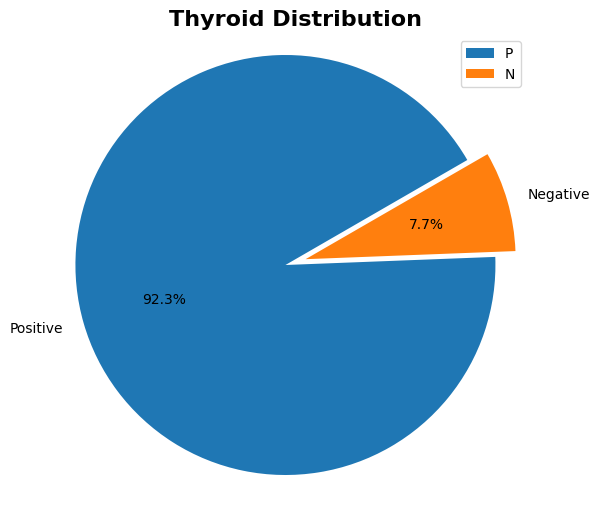

In [ ]:
import matplotlib.pyplot as plt

def balanced_plot(data):
    positive_count = data['Result'].value_counts()['P']
    negative_count = data['Result'].value_counts()['N']
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.legend(data['Result'].value_counts().index, loc='best')
    plt.show()

balanced_plot(data)

In [ ]:
# Create an empty list to store unique values
unique_values_list = []

# Iterate through each column in the dataset
for col in data.columns:
    # Get unique values for the current column
    unique_values = pd.unique(data[col])

    # Append the column name and its unique values to the list
    unique_values_list.append({'Column Name': col, 'Unique Values': unique_values})

# Create a DataFrame from the list of dictionaries
unique_values_df = pd.DataFrame(unique_values_list)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Age,"[12, 20, 46, 70, 18, 59, 80, 66, 68, 84, 67, 7..."
1,sex,"[F, M, nan]"
2,thyroxine,"[f, t]"
3,queryonthyroxine,"[f, t]"
4,onantithyroidmedication,"[f, t]"
5,sick,"[f, t]"
6,pregnant,"[f, t]"
7,thyroidsurgery,"[f, t]"
8,I131treatment,"[f, t]"
9,queryhypothyroid,"[f, t]"


## **Data Preprocessing**

### **Check Missing Values**

In [ ]:
data.isnull().sum()

,0
Age,0
sex,150
thyroxine,0
queryonthyroxine,0
onantithyroidmedication,0
sick,0
pregnant,0
thyroidsurgery,0
I131treatment,0
queryhypothyroid,0


In [ ]:
# Let's drop some unnecessary columns
data=data.drop(['TSHmeasured','T3measured', 'TT4measured',  'T4Umeasured','FTImeasured','TBG','TBGmeasured'],axis=1)
#Dropping faulty data
data=data[data['Age']!=455]

In [ ]:
data

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,0.00,0.0,other,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,0.0,109.0,0.91,120.0,other,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,0.00,0.0,other,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,30,F,f,f,f,f,f,f,f,f,...,t,f,f,0.00,0.0,0.0,0.00,0.0,other,P
3766,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,P
3767,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.10,1.8,112.0,1.07,105.0,other,P
3768,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,P


### **Imputation method for categorical columns**

In [ ]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

<ipython-input-6-3990da54c4fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sex'].fillna(most_frequent_sex, inplace=True)


In [ ]:
data.isnull().sum()

,0
Age,0
sex,0
thyroxine,0
queryonthyroxine,0
onantithyroidmedication,0
sick,0
pregnant,0
thyroidsurgery,0
I131treatment,0
queryhypothyroid,0


### **Duplicates**

In [ ]:
# Count of duplicates
print(data.duplicated().sum())  # Count of duplicates

# Drop duplicates
df_unique = data.drop_duplicates()

# Shape of the new dataset
print(df_unique.shape[0])
print(df_unique.shape)

63
3706
(3706, 23)


In [ ]:
# dropping duplicates
data.duplicated().sum()

63

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(3706, 23)

### **Scaling (Normalization)**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
columns=data.select_dtypes(include=['object']).columns
for i in columns:
  data[i]=lblEn.fit_transform(data[i])

In [ ]:
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source,Result
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1.30,2.5,125.0,1.14,109.0,1,1
1,20,1,0,0,0,0,0,0,0,0,...,0,0,0,4.10,2.0,102.0,0.00,0.0,4,1
2,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0.98,0.0,109.0,0.91,120.0,4,1
3,70,0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175.0,0.00,0.0,4,1
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61.0,0.87,70.0,3,1


In [ ]:
data['Result'].value_counts()

,count
Result,
1,3415
0,291


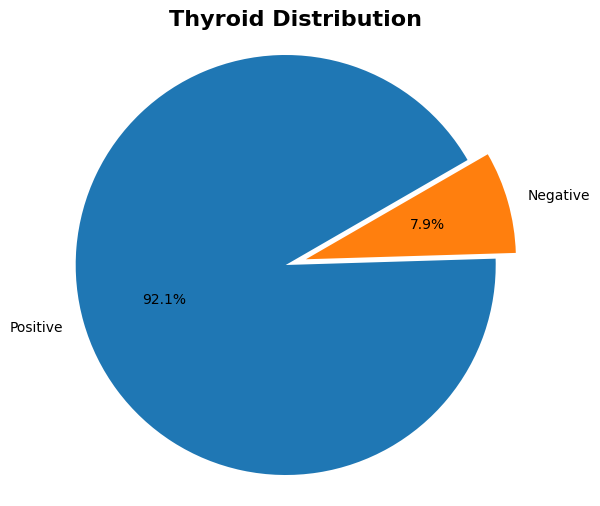

In [ ]:
def balanced_plot(data):
    positive_count = data['Result'].value_counts()[1]
    negative_count = data['Result'].value_counts()[0]
    labels = ['Positive', 'Negative']
    sizes = [positive_count, negative_count]
    colors = ['#1f77b4', '#ff7f0e']  # Blue for Positive, Orange for Negative
    explode = (0.1, 0)  # explode the 1st slice (Positive)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=30)
    plt.axis('equal')
    plt.title('Thyroid Distribution', fontsize=16, fontweight='bold')
    plt.show()

balanced_plot(data)

<Axes: xlabel='TSH', ylabel='FTI'>

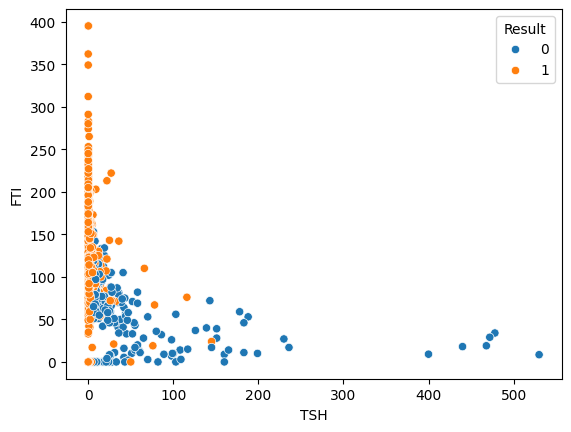

In [ ]:
sns.scatterplot(x='TSH', y='FTI', hue='Result', data=data)

## **Split the dataset**

In [ ]:
x=data.drop(['Result'],axis=1) #x contains all the features
y=data.Result   #y contains class label

In [ ]:
x.shape

(3706, 22)

In [ ]:
y.shape

(3706,)

In [ ]:
y.value_counts()

,count
Result,
1,3415
0,291


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(2964, 22)

In [ ]:
Y_train.shape

(2964,)

In [ ]:
X_test.shape

(742, 22)

In [ ]:
Y_test.shape

(742,)

In [ ]:
X_test.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,T4,T4U,FTI,referral source
3168,56,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1.40,2.3,111.0,0.97,115.0,4
1079,55,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.34,1.4,123.0,0.96,128.0,3
2074,73,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1.40,0.8,61.0,0.49,124.0,4
793,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.10,2.8,143.0,1.30,110.0,3
804,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,1.7,93.0,0.96,98.0,4


In [ ]:
Y_test.head()

,Result
3168,1
1079,1
2074,1
793,1
804,1


## **Cross validation Using SVM**

In [ ]:
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100,gamma='scale')

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)

Fold 1 Accuracy: 96.23%
Fold 2 Accuracy: 95.55%
Fold 3 Accuracy: 96.76%
Fold 4 Accuracy: 96.09%
Fold 5 Accuracy: 96.90%

Average Accuracy: 96.30%

Fold 1:


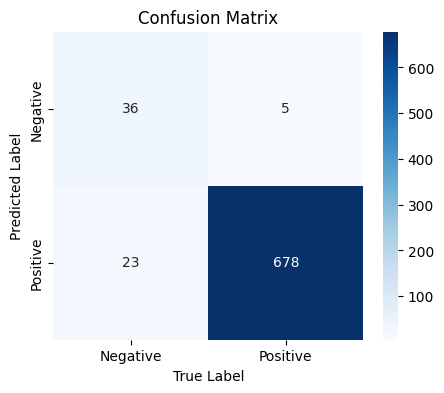


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        59
           1       0.97      0.99      0.98       683

    accuracy                           0.96       742
   macro avg       0.92      0.80      0.85       742
weighted avg       0.96      0.96      0.96       742
 
FPR: 0.39 
G-Mean: 0.78

Fold 2:


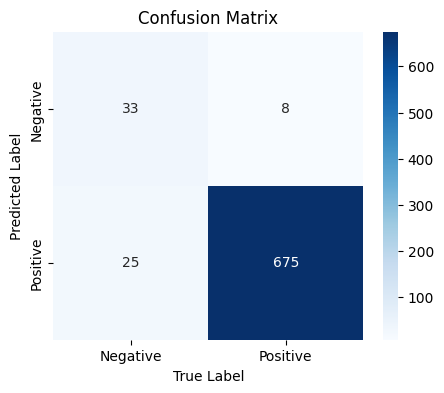


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        58
           1       0.96      0.99      0.98       683

    accuracy                           0.96       741
   macro avg       0.88      0.78      0.82       741
weighted avg       0.95      0.96      0.95       741
 
FPR: 0.43 
G-Mean: 0.75

Fold 3:


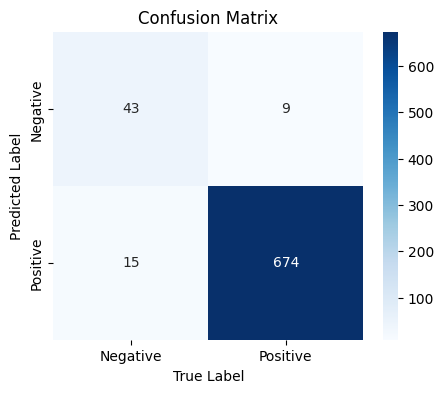


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        58
           1       0.98      0.99      0.98       683

    accuracy                           0.97       741
   macro avg       0.90      0.86      0.88       741
weighted avg       0.97      0.97      0.97       741
 
FPR: 0.26 
G-Mean: 0.86

Fold 4:


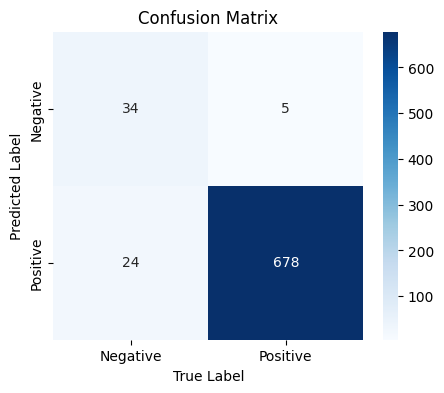


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.59      0.70        58
           1       0.97      0.99      0.98       683

    accuracy                           0.96       741
   macro avg       0.92      0.79      0.84       741
weighted avg       0.96      0.96      0.96       741
 
FPR: 0.41 
G-Mean: 0.76

Fold 5:


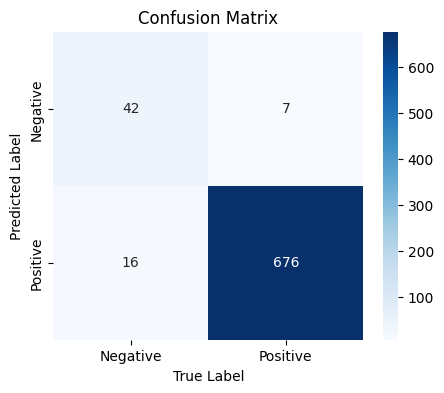


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.79        58
           1       0.98      0.99      0.98       683

    accuracy                           0.97       741
   macro avg       0.92      0.86      0.88       741
weighted avg       0.97      0.97      0.97       741
 
FPR: 0.28 
G-Mean: 0.85


In [ ]:
# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []
fprs = []
gmeans = []
# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)
    # Calculate FPR manually from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()  # ravel() unpacks the confusion matrix values
    fpr = fp / (fp + tn)
    fprs.append(fpr)
    # Calculate G-Mean (Geometric Mean)
    gmean = geometric_mean_score(y_test, y_pred)
    gmeans.append(gmean)
# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')

for i, (conf_matrix, classification_rep,fpr,gmean) in enumerate(zip(conf_matrices, classification_reports,fprs,gmeans), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep} \nFPR: {fpr:.2} \nG-Mean: {gmean:.2}')

## **Fuzzy SVM**

**Threshold value**

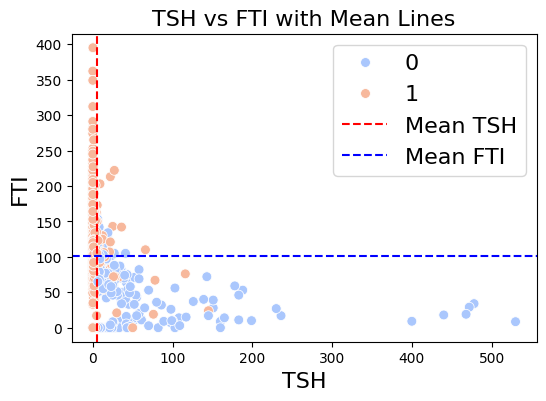

In [ ]:
# Calculate means for TSH and FTI
mean_tsh = data['TSH'].mean()
mean_fti = data['FTI'].mean()
# Create a scatter plot for TSH vs FTI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='TSH', y='FTI', hue='Result', palette='coolwarm', s=50)

# Add mean lines for TSH and FTI
plt.axvline(mean_tsh, color='red', linestyle='--', label='Mean TSH')
plt.axhline(mean_fti, color='blue', linestyle='--', label='Mean FTI')

# Add labels and legend
plt.xlabel('TSH',fontsize=16)
plt.ylabel('FTI',fontsize=16)
plt.title('TSH vs FTI with Mean Lines',fontsize=16)
plt.legend(fontsize=16)

# Show the plot
plt.show()

**Feature**

In [ ]:
class FuzzySVM:
    def __init__(self, C, kernel, gamma):
        self.C = C
        self.kernel = kernel
        self.svm = SVC(C=self.C, kernel=self.kernel)

    def fit(self, X, y, fuzzy_membership):
        self.X = X
        self.y = y
        self.fuzzy_membership = fuzzy_membership
        # Weighted fitting
        sample_weights = self.C * self.fuzzy_membership
        self.svm.fit(self.X, self.y, sample_weight=sample_weights)

    def predict(self, X):
        return self.svm.predict(X)

    def score(self, X, y):
        return self.svm.score(X, y)

# Define fuzzy membership function
def fuzzy_membershipL(X,y):
    f1='TSH'
    f2='FTI'
    T1= np.mean(X[f1])
    T2= np.mean(X[f2])
    delta=0.000001
    alpha=1
    beta=0.5
    f1_distance = np.zeros_like(y, dtype=float)
    f2_distance = np.zeros_like(y, dtype=float)
    for i in range(len(X)):
        # Calculate distance for each row
        f1_distance[i] = np.abs(T1 - X[f1].iloc[i])
        f2_distance[i] = np.abs(T2 - X[f2].iloc[i])

    # #Normalize distance
    f1_distances = f1_distance / (np.max(f1_distance)+delta)
    f2_distances = f2_distance / (np.max(f2_distance)+delta)

    # Using linear function
    f1_membership = (1-f1_distances)
    f2_membership = (1-f2_distances)

    # Assign membership
    membership = (alpha*f1_membership) + (beta*f2_membership)

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    membership[y == 0] *= class_0_ratio
    membership[y == 1] *= class_1_ratio
    return membership

def fuzzy_membershipE(X,y):
    f1='TSH'
    f2='FTI'
    T1= np.mean(X[f1])
    T2= np.mean(X[f2])
    delta=0.000001
    alpha=1
    beta=0.5
    gamma=1
    f1_distance = np.zeros_like(y, dtype=float)
    f2_distance = np.zeros_like(y, dtype=float)
    for i in range(len(X)):
        # Calculate distance for each row
        f1_distance[i] = np.abs(T1 - X[f1].iloc[i])
        f2_distance[i] = np.abs(T2 - X[f2].iloc[i])

    # Using exponential decay
    f1_membership = 2/(1+np.exp(gamma*f1_distance))
    f2_membership = 2/(1+np.exp(gamma*f2_distance))

    # Assign membership
    membership = (alpha*f1_membership) + (beta*f2_membership)

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    membership[y == 0] *= class_0_ratio
    membership[y == 1] *= class_1_ratio
    return membership

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i==1):
      x_test_sample = x_train[:500] # Convert to NumPy arrays for consistency
      y_test_sample = y_train[:500]
      k=y_test_sample==0
      x2 = x_test_sample.loc[k, ['TSH', 'FTI']]
      for index, row in x2.iterrows():
        print(index)
        print(f'TSH: {row.TSH}, FTI: {row.FTI}')

      break

15
TSH: 12.0, FTI: 87.0
58
TSH: 15.0, FTI: 100.0
85
TSH: 7.8, FTI: 96.0
101
TSH: 12.0, FTI: 122.0
115
TSH: 8.8, FTI: 131.0
121
TSH: 9.4, FTI: 74.0
188
TSH: 6.1, FTI: 0.0
220
TSH: 11.4, FTI: 102.0
250
TSH: 16.0, FTI: 0.0
259
TSH: 108.0, FTI: 14.0
282
TSH: 86.0, FTI: 32.0
294
TSH: 52.0, FTI: 71.0
304
TSH: 6.1, FTI: 95.0
368
TSH: 24.0, FTI: 53.0
371
TSH: 42.0, FTI: 16.0
374
TSH: 12.0, FTI: 98.0
379
TSH: 10.0, FTI: 0.0
383
TSH: 8.6, FTI: 114.0
394
TSH: 6.2, FTI: 112.0
400
TSH: 28.0, FTI: 0.0
406
TSH: 9.7, FTI: 51.0
409
TSH: 28.0, FTI: 47.0
411
TSH: 15.0, FTI: 133.0
417
TSH: 18.0, FTI: 77.0
420
TSH: 55.0, FTI: 43.0
439
TSH: 10.0, FTI: 71.0
446
TSH: 6.7, FTI: 89.0
454
TSH: 7.6, FTI: 118.0
468
TSH: 8.0, FTI: 108.0
498
TSH: 11.0, FTI: 116.0
510
TSH: 11.0, FTI: 101.0
521
TSH: 44.0, FTI: 57.0
525
TSH: 7.9, FTI: 97.0
529
TSH: 11.0, FTI: 58.0
547
TSH: 15.0, FTI: 76.0
550
TSH: 7.2, FTI: 92.0
563
TSH: 12.0, FTI: 51.0
586
TSH: 6.4, FTI: 65.0
592
TSH: 25.0, FTI: 68.0
603
TSH: 33.0, FTI: 0.0
639
TSH: 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


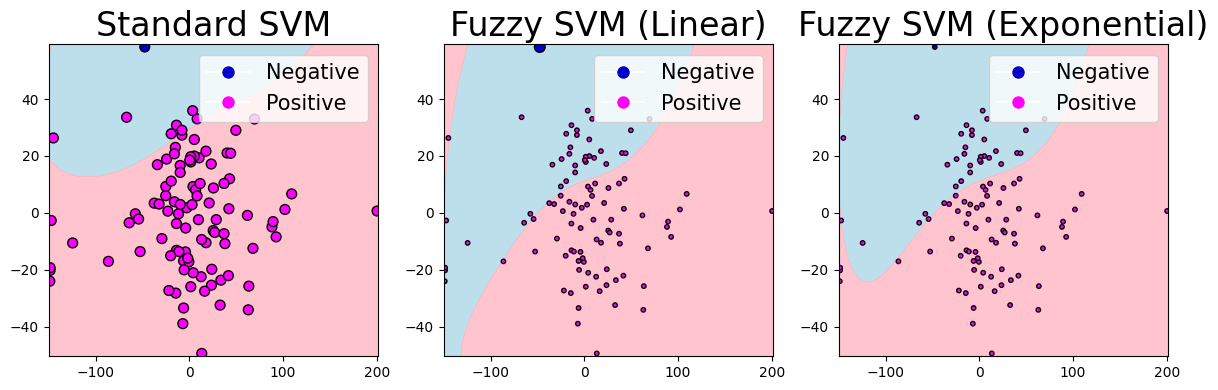

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)
r1=100
r2=200
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100,gamma='scale')
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i==2):
      x_test_sample = x_train[r1:r2].to_numpy()  # Convert to NumPy arrays for consistency
      y_test_sample = y_train[r1:r2].to_numpy()  # Convert to NumPy arrays for consistency
      break
model.fit(x_train, y_train)
# Fuzzy SVM with linear fuzzy membership
fuzzy_membership_L = fuzzy_membershipL(x_train, y_train)
fuzzy_svmL = FuzzySVM(C=100, kernel='rbf', gamma='scale')
fuzzy_svmL.fit(x_train, y_train, fuzzy_membership_L)

# Fuzzy SVM with exponential fuzzy membership
fuzzy_membership_E = fuzzy_membershipE(x_train, y_train)
fuzzy_svmE = FuzzySVM(C=100, kernel='rbf', gamma='scale')
fuzzy_svmE.fit(x_train, y_train, fuzzy_membership_E)

pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(x_test_sample)

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, ax, m=None,membership=None,h=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

     # Project mesh grid back to original feature space
    mesh_grid_2d = np.c_[xx.ravel(), yy.ravel()]
    mesh_grid_full = pca.inverse_transform(mesh_grid_2d)  # Inverse transform to get back to original space

    # Predict for every point in the mesh
    Z = model.predict(mesh_grid_full)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8,levels=[-1, 0, 1], colors=['lightblue', 'lightpink'])
    if m=='l':
        sizes = 50* membership  # Adjust the multiplier to change size scaling
        sizes = np.clip(sizes, 10, 200)  # Limit the minimum and maximum sizes
    elif m=='e':
        sizes = 100 * membership  # Adjust the multiplier to change size scaling
        sizes = np.clip(sizes, 10, 200)  # Limit the minimum and maximum sizes
    else:
        sizes = 50  # Default size if no membership is provided
    custom_cmap = LinearSegmentedColormap.from_list("custom", ["mediumblue", "magenta"])
    # Scatter plot with point size reflecting fuzzy membership
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=custom_cmap, s=sizes)

    # Add legend for blue (negative) and pink (positive)
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Negative',
                              markerfacecolor='mediumblue', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Positive',
                              markerfacecolor='magenta', markersize=10)]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=15)

# Plot all models
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
# Plot Standard SVM
plot_decision_boundary(x_test_2d, y_test_sample, model, ax[0])
ax[0].set_title('Standard SVM',fontsize=24)

# Plot Fuzzy SVM (Linear Membership)
plot_decision_boundary(x_test_2d, y_test_sample, fuzzy_svmL, ax[1],m='l', membership=fuzzy_membership_L[r1:r2])
ax[1].set_title('Fuzzy SVM (Linear)',fontsize=24)

# Plot Fuzzy SVM (Exponential Membership)
plot_decision_boundary(x_test_2d, y_test_sample, fuzzy_svmE, ax[2],m='e', membership=fuzzy_membership_E[r1:r2])
ax[2].set_title('Fuzzy SVM (Exponential)',fontsize=24)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


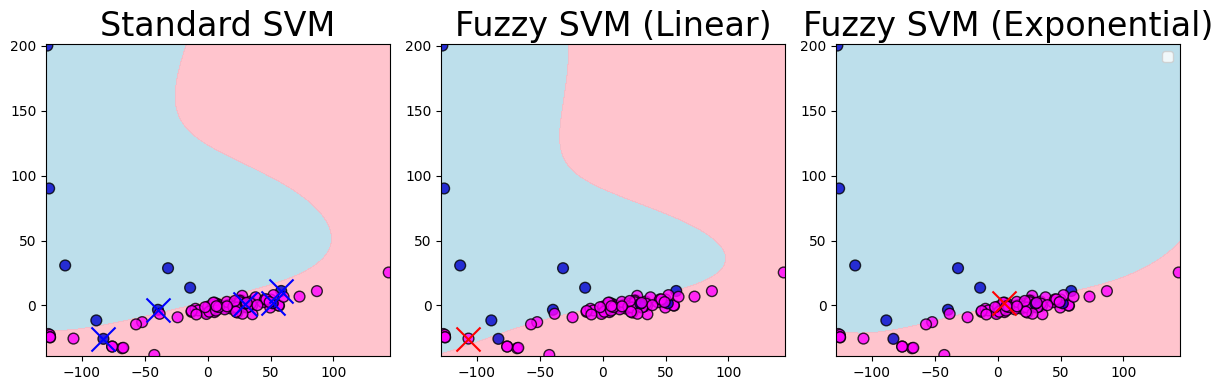

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100,gamma='scale')
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i==1):
      break
      # Select 100 test samples
x_test_sample = x_test[-100:]
y_test_sample = y_test[-100:]

# Train the standard SVM model
model.fit(x_train, y_train)

# Predict on the full test data (no PCA for prediction)
y_pred1 = model.predict(x_test_sample)

# Fuzzy SVM with linear fuzzy membership
fuzzy_membership_fold_L = fuzzy_membershipL(x_train, y_train)
fuzzy_svmL = FuzzySVM(C=100, kernel='rbf', gamma='scale')
fuzzy_svmL.fit(x_train, y_train, fuzzy_membership_fold_L)
y_pred2 = fuzzy_svmL.predict(x_test_sample)

# Fuzzy SVM with exponential fuzzy membership
fuzzy_membership_fold_E = fuzzy_membershipE(x_train, y_train)
fuzzy_svmE = FuzzySVM(C=100, kernel='rbf', gamma='scale')
fuzzy_svmE.fit(x_train, y_train, fuzzy_membership_fold_E)
y_pred3 = fuzzy_svmE.predict(x_test_sample)

# Apply PCA only for visualization (reduce test set to 2D for plotting)
pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(x_test_sample)

# Plot decision boundaries of all models (SVM and Fuzzy SVMs)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted figure size for 3 plots
# Function to plot the decision boundary
def plot_decision_boundary(X_2d, y, model, pca, ax, h=0.1):
    # Create a mesh grid based on feature range (in 2D space)
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Project mesh grid back to original feature space
    mesh_grid_2d = np.c_[xx.ravel(), yy.ravel()]
    mesh_grid_full = pca.inverse_transform(mesh_grid_2d)  # Inverse transform to get back to original space

    # Predict over the mesh grid using the model trained on full features
    Z = model.predict(mesh_grid_full)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8,levels=[-1, 0, 1], colors=['lightblue', 'lightpink'])
# Plot the actual test data points with darker shades
    custom_cmap = LinearSegmentedColormap.from_list("custom", ["mediumblue", "magenta"])
    # Scatter plot with point size reflecting fuzzy membership
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=custom_cmap, edgecolor='k', s=60, alpha=0.8)  # Darker shades

    return scatter

# Function to plot decision boundary and misclassifications
def plot_model_and_misclassifications(X_2d, y_true, y_pred, model, pca,title, ax):
    plot_decision_boundary(X_2d, y_true, model,pca, ax)
    plt.legend()
    ax.set_title(title,fontsize=24)

    # Highlight misclassifications
    misclassified = (y_pred != y_true)
    # Identify misclassified positives and negatives
    misclassified_positives = (misclassified) & (y_true == 1)  # Assuming 1 is the positive class
    misclassified_negatives = (misclassified) & (y_true == 0)  # Assuming 0 is the negative class

    # Plot misclassified positives in red
    ax.scatter(
        X_2d[misclassified_positives][:, 0],
        X_2d[misclassified_positives][:, 1],
        color='red',
        marker='x',  # Red cross for misclassified positives
        s=300,
    )

    # Plot misclassified negatives in blue
    ax.scatter(
        X_2d[misclassified_negatives][:, 0],
        X_2d[misclassified_negatives][:, 1],
        color='blue',
        marker='x',  # Blue cross for misclassified negatives
        s=300,
    )


# Plot SVM
plot_model_and_misclassifications(x_test_2d, y_test_sample, y_pred1, model, pca,  'Standard SVM', ax[0])

# Plot Fuzzy SVM (Linear)
plot_model_and_misclassifications(x_test_2d, y_test_sample, y_pred2, fuzzy_svmL, pca, 'Fuzzy SVM (Linear)', ax[1])

# Plot Fuzzy SVM (Exponential)
plot_model_and_misclassifications(x_test_2d, y_test_sample, y_pred3, fuzzy_svmE, pca, 'Fuzzy SVM (Exponential)', ax[2])

plt.tight_layout()
plt.show()

In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100, gamma='scale')

for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i == 1):
        break

# Select 100 test samples
x_test_sample = x_test[-100:]
y_test_sample = y_test[-100:]

# Train the standard SVM model
model.fit(x_train, y_train)

# Predict on the full test data (no PCA for prediction)
y_pred1 = model.predict(x_test_sample)

# Identify misclassified samples
misclassified = (y_pred1 != y_test_sample)

# Extract TSH and FTI values for the misclassified samples
misclassified_data = x_test_sample[misclassified]
tsh_values = misclassified_data['TSH']
fti_values = misclassified_data['FTI']

# Print the TSH and FTI values of the misclassified samples
print("TSH values of misclassified samples in Standard SVM:")
print(tsh_values)

print("\nFTI values of misclassified samples in Standard SVM:")
print(fti_values)


TSH values of misclassified samples in Standard SVM:
3368    6.5
3438    8.0
3498    6.3
3601    6.8
3690    8.1
Name: TSH, dtype: float64

FTI values of misclassified samples in Standard SVM:
3368     67.0
3438    142.0
3498    119.0
3601      0.0
3690    103.0
Name: FTI, dtype: float64


In [ ]:
# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5,
                      random_state=1,
                      shuffle=True)
# Initialize the SVM classifier with linear kernel
model = SVC(kernel='rbf', C=100, gamma='scale')

for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    if(i == 1):
        break

# Select 100 test samples
x_test_sample = x_test[-100:]
y_test_sample = y_test[-100:]

# Train the standard SVM model
model.fit(x_train, y_train)

# Predict on the full test data (no PCA for prediction)
y_pred1 = model.predict(x_test_sample)

# Identify misclassified samples
misclassified = (y_pred1 != y_test_sample)

# Extract TSH and FTI values for the misclassified samples
misclassified_data = x_test_sample[misclassified]
tsh_values = misclassified_data['TSH']
fti_values = misclassified_data['FTI']

# Print the TSH and FTI values of the misclassified samples
print("TSH values of misclassified samples in Standard SVM:")
print(tsh_values)

print("\nFTI values of misclassified samples in Standard SVM:")
print(fti_values)


### **Membership**

In [ ]:
import pandas as pd

# Initialize StratifiedKFold and Fuzzy SVM model
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='scale')

# Loop through the splits
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    if i == 4:
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Select specific rows (30 to 50)
        x1 = x_train.iloc[50:100]
        y1 = y_train.iloc[50:100]

        break

# Compute fuzzy memberships for the entire fold
membership1 = fuzzy_membershipL(x_train, y_train)  # Linear membership for full fold
membership2, f1, f2 = fuzzy_membershipE(x_train, y_train)  # Exponential memberships and distances
f1=f1[50:100]
f2=f2[50:100]
# Extract the membership values and distances for the desired range (30 to 50)
membership1_subset = membership1[50:100]
membership2_subset = membership2[50:100]

# Arrange the table for the specified range
table = pd.DataFrame({
    'index': x1.index,                          # Index column
    'TSH': x1['TSH'],                           # TSH values
    'FTI': x1['FTI'],                           # FTI values
    'Distance from TSH': f1,      # Distances from TSH
    'Distance from FTI': f2,      # Distances from FTI
    'Class label': y1,                          # Class labels
    'Linear Fuzzy Membership': membership1_subset,  # Linear fuzzy memberships
    'Exponential Fuzzy Membership': membership2_subset  # Exponential fuzzy memberships
})

# Display the table
print(table.to_string(index=False))  # Print without row index
# table.to_csv('fuzzy_svm_results.csv', index=False)

 index     TSH   FTI  Distance from TSH  Distance from FTI  Class label  Linear Fuzzy Membership  Exponential Fuzzy Membership
    63   1.000  84.0           3.541592          16.662631            1                 0.124939                  4.801869e-03
    64   2.900  98.0           1.641592           2.662631            1                 0.127276                  3.323678e-02
    65   1.300  94.0           3.241592           6.662631            1                 0.126437                  6.527458e-03
    66   0.000   0.0           4.541592         100.662631            1                 0.112607                  1.798512e-03
    67   3.200 103.0           1.341592           2.337369            1                 0.127372                  4.286209e-02
    68   0.200 135.0           4.341592          34.337369            1                 0.122249                  2.191591e-03
    69   9.000 203.0           4.458408         102.337369            1                 0.112378               

## **Result**

**Linear**

Fold 1 Accuracy: 97.57%
Fold 2 Accuracy: 97.44%
Fold 3 Accuracy: 96.22%
Fold 4 Accuracy: 96.36%
Fold 5 Accuracy: 95.68%

Average Accuracy: 96.65%

Average TPR: 0.97
Average TNR: 0.95
Average FPR: 0.05
Average G-Mean: 0.96

Fold 1:


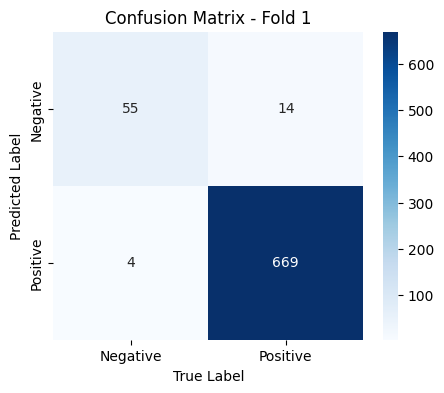

TPR: 0.98
TNR: 0.93
FPR: 0.07
G-Mean: 0.96

Fold 2:


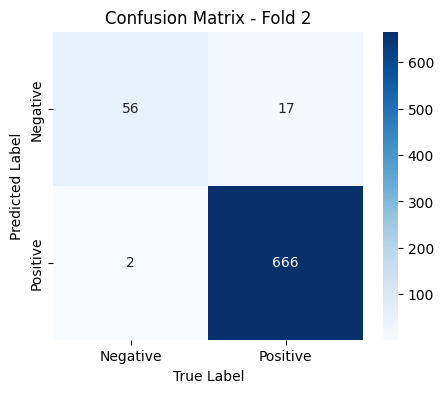

TPR: 0.98
TNR: 0.97
FPR: 0.03
G-Mean: 0.97

Fold 3:


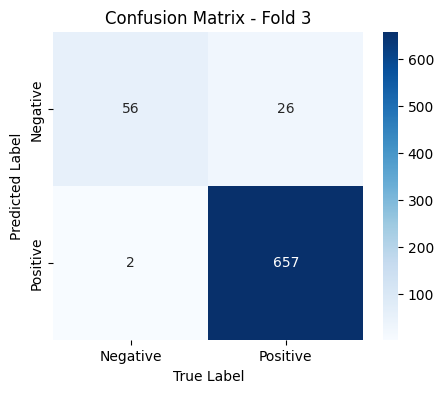

TPR: 0.96
TNR: 0.97
FPR: 0.03
G-Mean: 0.96

Fold 4:


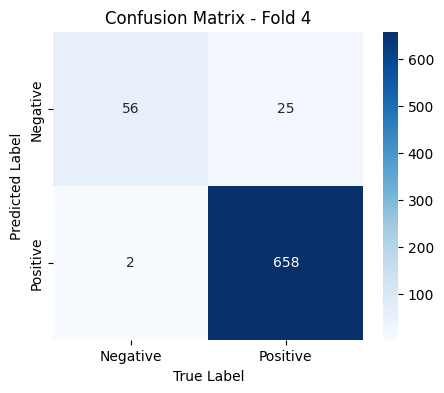

TPR: 0.96
TNR: 0.97
FPR: 0.03
G-Mean: 0.96

Fold 5:


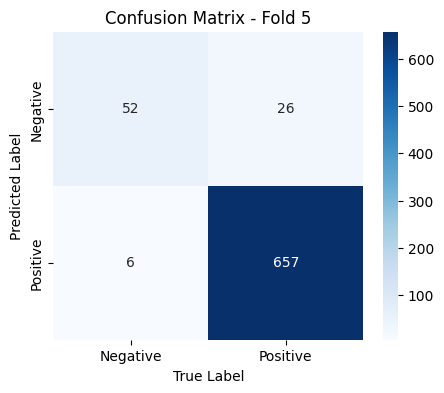

TPR: 0.96
TNR: 0.90
FPR: 0.10
G-Mean: 0.93


In [ ]:
# Initialize the Fuzzy SVM model
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='scale')
# Placeholder for cumulative metrics to compute averages
accuracy_scores = []
conf_matrices = []
fprs = []
tnrs = []
tprs = []
gmeans = []

# Use a for loop and StratifiedKFold's split operation to get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Compute fuzzy membership for the training fold
    fuzzy_membership_fold = fuzzy_membershipL(x_train_fold, y_train_fold)

    # Train the Fuzzy SVM model
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_fold)

    # Predict on the test set
    y_pred = fuzzy_svm.predict(x_test_fold)

    # Evaluate the model
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test_fold, y_pred)
    conf_matrices.append(conf_matrix)

    # Calculate FPR, TPR, TNR, and G-Mean from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    gmean = (tpr * tnr) ** 0.5  # G-Mean

    tprs.append(tpr)
    tnrs.append(tnr)
    fprs.append(fpr)
    gmeans.append(gmean)

# Calculate and print the average accuracy across all folds
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {avg_accuracy:.2%}')

# Calculate and print average FPR, TNR, TPR, and G-Mean
avg_fpr = sum(fprs) / len(fprs)
avg_tnr = sum(tnrs) / len(tnrs)
avg_tpr = sum(tprs) / len(tprs)
avg_gmean = sum(gmeans) / len(gmeans)

print(f'\nAverage TPR: {avg_tpr:.2f}')
print(f'Average TNR: {avg_tnr:.2f}')
print(f'Average FPR: {avg_fpr:.2f}')
print(f'Average G-Mean: {avg_gmean:.2f}')

# Print detailed results per fold and show confusion matrices
for i, (conf_matrix,fpr, tnr, tpr, gmean) in enumerate(zip(conf_matrices, fprs, tnrs, tprs, gmeans), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title(f'Confusion Matrix - Fold {i}')
    plt.show()



    print(f'TPR: {tpr:.2f}')
    print(f'TNR: {tnr:.2f}')
    print(f'FPR: {fpr:.2f}')
    print(f'G-Mean: {gmean:.2f}')


**Exponential**

Fold 1 Accuracy: 97.71%
Fold 2 Accuracy: 97.57%
Fold 3 Accuracy: 97.44%
Fold 4 Accuracy: 97.17%
Fold 5 Accuracy: 96.22%

Average Accuracy: 97.22%

Average TPR: 0.97
Average TNR: 0.97
Average FPR: 0.03
Average G-Mean: 0.97

Fold 1:


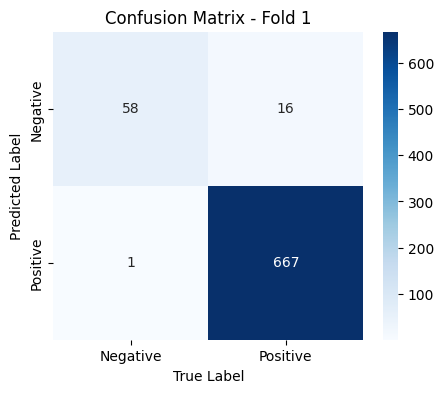

TPR: 0.98
TNR: 0.98
FPR: 0.02
G-Mean: 0.98

Fold 2:


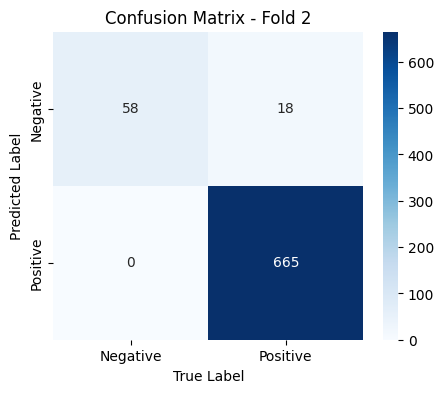

TPR: 0.97
TNR: 1.00
FPR: 0.00
G-Mean: 0.99

Fold 3:


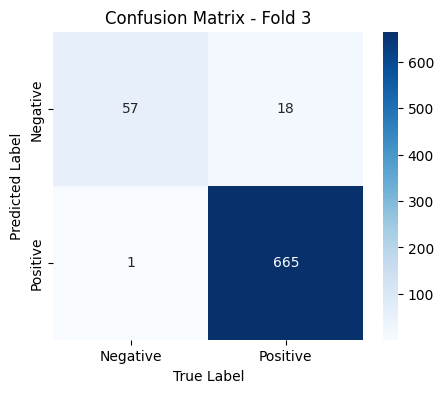

TPR: 0.97
TNR: 0.98
FPR: 0.02
G-Mean: 0.98

Fold 4:


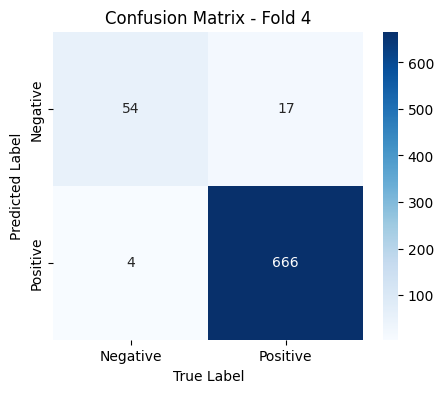

TPR: 0.98
TNR: 0.93
FPR: 0.07
G-Mean: 0.95

Fold 5:


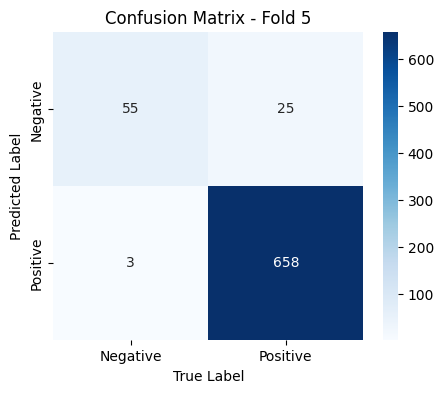

TPR: 0.96
TNR: 0.95
FPR: 0.05
G-Mean: 0.96


In [ ]:
# Initialize the Fuzzy SVM model
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='scale')
# Placeholder for cumulative metrics to compute averages
accuracy_scores = []
conf_matrices = []
fprs = []
tnrs = []
tprs = []
gmeans = []

# Use a for loop and StratifiedKFold's split operation to get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Compute fuzzy membership for the training fold
    fuzzy_membership_fold = fuzzy_membershipE(x_train_fold, y_train_fold)

    # Train the Fuzzy SVM model
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_fold)

    # Predict on the test set
    y_pred = fuzzy_svm.predict(x_test_fold)

    # Evaluate the model
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test_fold, y_pred)
    conf_matrices.append(conf_matrix)

    # Calculate FPR, TPR, TNR, and G-Mean from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    fpr = fp / (fp + tn)  # False Positive Rate
    gmean = (tpr * tnr) ** 0.5  # G-Mean

    tprs.append(tpr)
    tnrs.append(tnr)
    fprs.append(fpr)
    gmeans.append(gmean)

# Calculate and print the average accuracy across all folds
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {avg_accuracy:.2%}')

# Calculate and print average FPR, TNR, TPR, and G-Mean
avg_fpr = sum(fprs) / len(fprs)
avg_tnr = sum(tnrs) / len(tnrs)
avg_tpr = sum(tprs) / len(tprs)
avg_gmean = sum(gmeans) / len(gmeans)

print(f'\nAverage TPR: {avg_tpr:.2f}')
print(f'Average TNR: {avg_tnr:.2f}')
print(f'Average FPR: {avg_fpr:.2f}')
print(f'Average G-Mean: {avg_gmean:.2f}')

# Print detailed results per fold and show confusion matrices
for i, (conf_matrix,fpr, tnr, tpr, gmean) in enumerate(zip(conf_matrices, fprs, tnrs, tprs, gmeans), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title(f'Confusion Matrix - Fold {i}')
    plt.show()



    print(f'TPR: {tpr:.2f}')
    print(f'TNR: {tnr:.2f}')
    print(f'FPR: {fpr:.2f}')
    print(f'G-Mean: {gmean:.2f}')


**ROC**

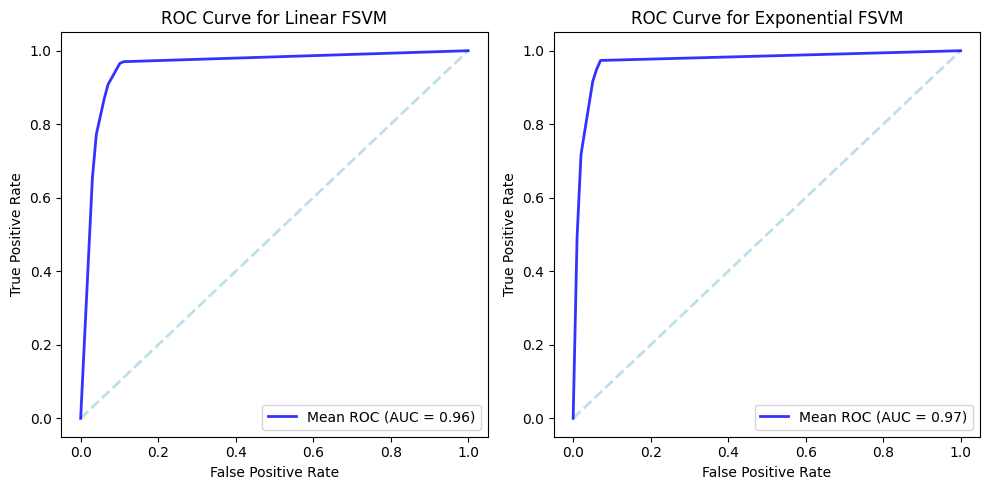

Average ROC AUC: 0.9567
Average ROC AUC: 0.9707


In [ ]:
fprsL=[]
tprsL=[]
roc_aucsL=[]
fprsE=[]
tprsE=[]
roc_aucsE=[]
mean_fpr = np.linspace(0, 1, 100)
fig,axes=plt.subplots(1,2,figsize=(10,5))
# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='scale')
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    # x_train_fold = pd.DataFrame(x_train_fold)
    fuzzy_membership_foldL = fuzzy_membershipL(x_train_fold,y_train_fold)
    fuzzy_membership_foldE = fuzzy_membershipE(x_train_fold,y_train_fold)
      # Train the Fuzzy SVM for method L
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_foldL)
    y_predL = fuzzy_svm.predict(x_test_fold)
    fprL, tprL, _ = roc_curve(y_test_fold, y_predL)
    roc_aucL = auc(fprL, tprL)
    roc_aucsL.append(roc_aucL)
    interp_tprL = np.interp(mean_fpr, fprL, tprL)
    interp_tprL[0] = 0.0
    tprsL.append(interp_tprL)

    # Train the Fuzzy SVM for method E
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_foldE)
    y_predE = fuzzy_svm.predict(x_test_fold)
    fprE, tprE, _ = roc_curve(y_test_fold, y_predE)
    roc_aucE = auc(fprE, tprE)
    roc_aucsE.append(roc_aucE)
    interp_tprE = np.interp(mean_fpr, fprE, tprE)
    interp_tprE[0] = 0.0
    tprsE.append(interp_tprE)
# Plot ROC curve for fuzzy membership L
axes[0].plot([0, 1], [0, 1], linestyle='--', lw=2, color='lightblue', alpha=0.8)
mean_tprL = np.mean(tprsL, axis=0)
mean_tprL[-1] = 1.0  # Ensure the curve ends at (1,1)
mean_aucL = auc(mean_fpr, mean_tprL)
axes[0].plot(mean_fpr, mean_tprL, color='b', label=f'Mean ROC (AUC = {mean_aucL:.2f})', lw=2, alpha=0.8)
axes[0].set_title('ROC Curve for Linear FSVM')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right')

# Plot ROC curve for fuzzy membership E
axes[1].plot([0, 1], [0, 1], linestyle='--', lw=2, color='lightblue', alpha=0.8)
mean_tprE = np.mean(tprsE, axis=0)
mean_tprE[-1] = 1.0  # Ensure the curve ends at (1,1)
mean_aucE = auc(mean_fpr, mean_tprE)
axes[1].plot(mean_fpr, mean_tprE, color='b', label=f'Mean ROC (AUC = {mean_aucE:.2f})', lw=2, alpha=0.8)
axes[1].set_title('ROC Curve for Exponential FSVM')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()
# Print average ROC AUC across all folds
print(f'Average ROC AUC: {sum(roc_aucsL) / len(roc_aucsL):.4f}')
print(f'Average ROC AUC: {sum(roc_aucsE) / len(roc_aucsE):.4f}')

**ROC Comparison**

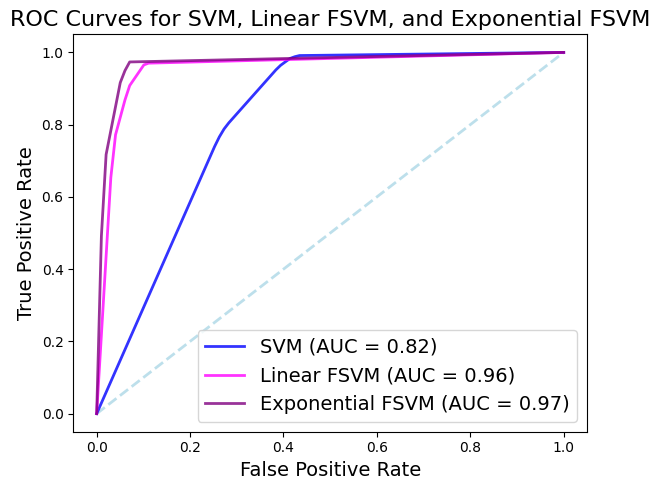

In [ ]:
fprs=[]
tprs=[]
roc_aucs=[]
fprsL=[]
tprsL=[]
roc_aucsL=[]
fprsE=[]
tprsE=[]
roc_aucsE=[]
mean_fpr = np.linspace(0, 1, 100)
# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='scale')
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the Fuzzy SVM for SVM
    model.fit(x_train_fold,y_train_fold)
    y_pred = model.predict(x_test_fold)
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

    fuzzy_membership_foldL = fuzzy_membershipL(x_train_fold,y_train_fold)
    fuzzy_membership_foldE = fuzzy_membershipE(x_train_fold,y_train_fold)
      # Train the Fuzzy SVM for method L
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_foldL)
    y_predL = fuzzy_svm.predict(x_test_fold)
    fprL, tprL, _ = roc_curve(y_test_fold, y_predL)
    roc_aucL = auc(fprL, tprL)
    roc_aucsL.append(roc_aucL)
    interp_tprL = np.interp(mean_fpr, fprL, tprL)
    interp_tprL[0] = 0.0
    tprsL.append(interp_tprL)

    # Train the Fuzzy SVM for method E
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_foldE)
    y_predE = fuzzy_svm.predict(x_test_fold)
    fprE, tprE, _ = roc_curve(y_test_fold, y_predE)
    roc_aucE = auc(fprE, tprE)
    roc_aucsE.append(roc_aucE)
    interp_tprE = np.interp(mean_fpr, fprE, tprE)
    interp_tprE[0] = 0.0
    tprsE.append(interp_tprE)

# Plot all ROC curves in a single plot
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='lightblue', alpha=0.8)

# Plot SVM ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Ensure the curve ends at (1,1)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'SVM (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot Linear FSVM ROC curve
mean_tprL = np.mean(tprsL, axis=0)
mean_tprL[-1] = 1.0  # Ensure the curve ends at (1,1)
mean_aucL = auc(mean_fpr, mean_tprL)
plt.plot(mean_fpr, mean_tprL, color='magenta', label=f'Linear FSVM (AUC = {mean_aucL:.2f})', lw=2, alpha=0.8)

# Plot Exponential FSVM ROC curve
mean_tprE = np.mean(tprsE, axis=0)
mean_tprE[-1] = 1.0  # Ensure the curve ends at (1,1)
mean_aucE = auc(mean_fpr, mean_tprE)
plt.plot(mean_fpr, mean_tprE, color='purple', label=f'Exponential FSVM (AUC = {mean_aucE:.2f})', lw=2, alpha=0.8)

# Customize the plot
plt.title('ROC Curves for SVM, Linear FSVM, and Exponential FSVM',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.legend(loc='lower right',fontsize=14)

plt.tight_layout()
plt.show()

## **Extra**

**Class Center**

In [ ]:
class FuzzySVM:
    def __init__(self, C, kernel, gamma):
        self.C = C
        self.kernel = kernel
        self.svm = SVC(C=self.C, kernel=self.kernel)

    def fit(self, X, y, fuzzy_membership):
        self.X = X
        self.y = y
        self.fuzzy_membership = fuzzy_membership
        # Weighted fitting
        sample_weights = self.C * self.fuzzy_membership
        self.svm.fit(self.X, self.y, sample_weight=sample_weights)

    def predict(self, X):
        return self.svm.predict(X)

    def score(self, X, y):
        return self.svm.score(X, y)

#Define fuzzy membership function based on distance from class centers
def fuzzy_membership(X, y):
    delta=0.000001
    beta=0.1
    class_centers = {}
    for label in np.unique(y):
        class_centers[label] = X[y == label].mean(axis=0)

    distances = np.zeros_like(y, dtype=float)
    for i, (x_i, y_i) in enumerate(zip(X, y)):
        class_center = class_centers[y_i]
        distances[i] = np.linalg.norm(x_i - class_center)
   # Normalize distances
    center_distances = distances / (np.max(distances)+delta)

    # fuzzy_membership = 1-center_distances #Using linear function

    fuzzy_membership = 2/(1+np.exp(beta*distances))  # Using inverse-sigmoid function

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    fuzzy_membership[y == 0] *= class_0_ratio
    fuzzy_membership[y == 1] *= class_1_ratio

    return fuzzy_membership


Fold 1 Accuracy: 90.97%
Fold 2 Accuracy: 89.61%
Fold 3 Accuracy: 91.77%
Fold 4 Accuracy: 94.33%
Fold 5 Accuracy: 93.39%

Average Accuracy: 92.01%

Fold 1:


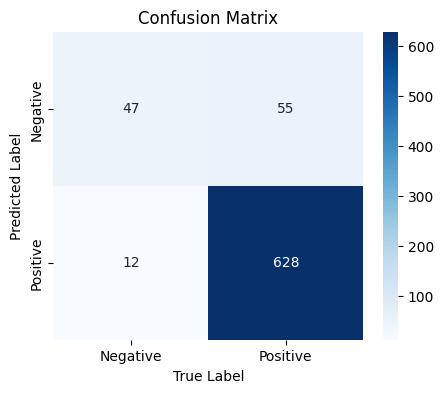


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.80      0.58        59
           1       0.98      0.92      0.95       683

    accuracy                           0.91       742
   macro avg       0.72      0.86      0.77       742
weighted avg       0.94      0.91      0.92       742
 
FPR: 0.2 
G-Mean: 0.86

Fold 2:


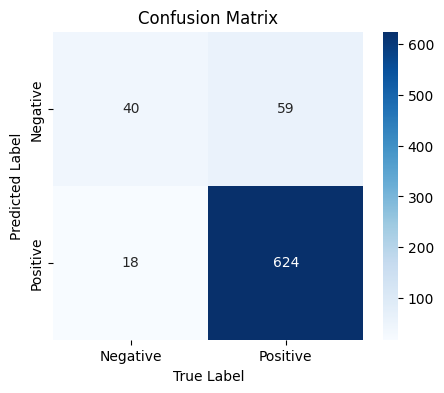


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.69      0.51        58
           1       0.97      0.91      0.94       683

    accuracy                           0.90       741
   macro avg       0.69      0.80      0.73       741
weighted avg       0.93      0.90      0.91       741
 
FPR: 0.31 
G-Mean: 0.79

Fold 3:


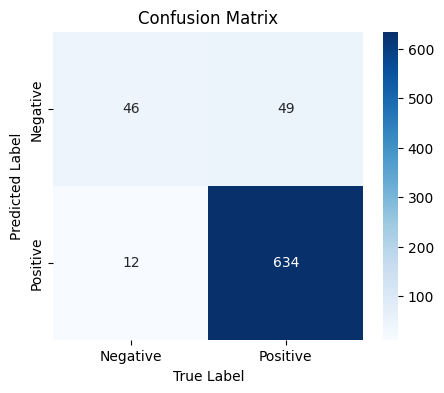


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.79      0.60        58
           1       0.98      0.93      0.95       683

    accuracy                           0.92       741
   macro avg       0.73      0.86      0.78       741
weighted avg       0.94      0.92      0.93       741
 
FPR: 0.21 
G-Mean: 0.86

Fold 4:


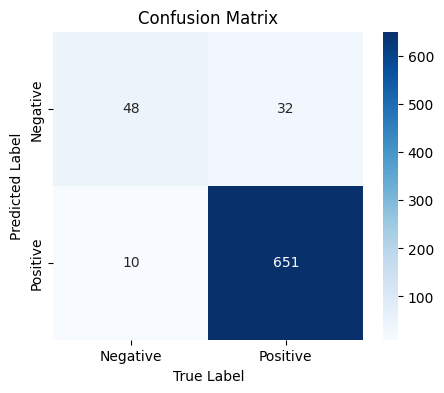


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.83      0.70        58
           1       0.98      0.95      0.97       683

    accuracy                           0.94       741
   macro avg       0.79      0.89      0.83       741
weighted avg       0.95      0.94      0.95       741
 
FPR: 0.17 
G-Mean: 0.89

Fold 5:


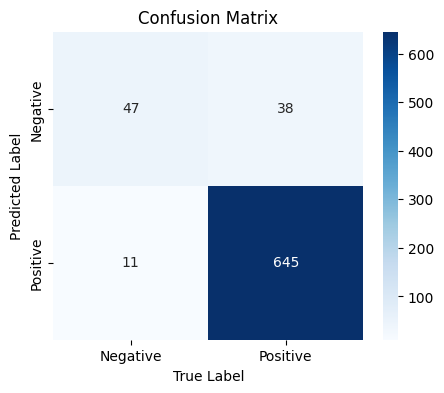


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.81      0.66        58
           1       0.98      0.94      0.96       683

    accuracy                           0.93       741
   macro avg       0.77      0.88      0.81       741
weighted avg       0.95      0.93      0.94       741
 
FPR: 0.19 
G-Mean: 0.87


In [ ]:
# Initialize the Fuzzy SVM model
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='100')

# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []
fprs = []
gmeans = []
# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    fuzzy_membership_fold = fuzzy_membership(x_train_fold.values,y_train_fold.values)

    # Train the Fuzzy SVM model
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_fold)

    # Predict on the test set
    y_pred = fuzzy_svm.predict(x_test_fold)

    # Evaluate the model
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test_fold, y_pred)
    classification_rep = classification_report(y_test_fold, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)
    # Calculate FPR manually from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()  # ravel() unpacks the confusion matrix values
    fpr = fp / (fp + tn)
    fprs.append(fpr)
    # Calculate G-Mean (Geometric Mean)
    gmean = geometric_mean_score(y_test_fold, y_pred)
    gmeans.append(gmean)
# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')

for i, (conf_matrix, classification_rep,fpr,gmean) in enumerate(zip(conf_matrices, classification_reports,fprs,gmeans), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep} \nFPR: {fpr:.2} \nG-Mean: {gmean:.2}')

**Hyperplane**

Fold 1 Accuracy: 97.30%
Fold 2 Accuracy: 96.90%
Fold 3 Accuracy: 96.22%
Fold 4 Accuracy: 96.22%
Fold 5 Accuracy: 95.28%

Average Accuracy: 96.38%

Fold 1:


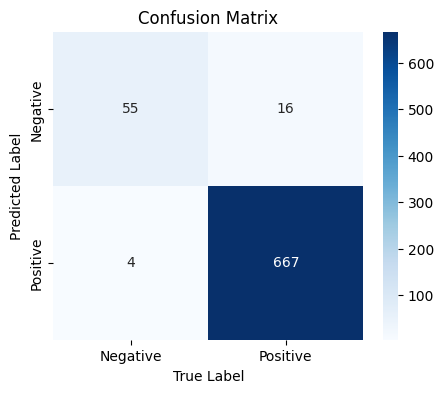


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.85        59
           1       0.99      0.98      0.99       683

    accuracy                           0.97       742
   macro avg       0.88      0.95      0.92       742
weighted avg       0.98      0.97      0.97       742
 
FPR: 0.068 
G-Mean: 0.95

Fold 2:


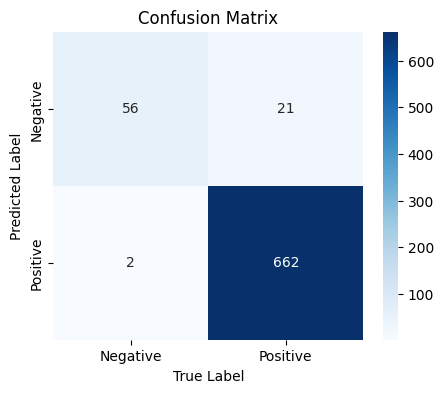


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        58
           1       1.00      0.97      0.98       683

    accuracy                           0.97       741
   macro avg       0.86      0.97      0.91       741
weighted avg       0.98      0.97      0.97       741
 
FPR: 0.034 
G-Mean: 0.97

Fold 3:


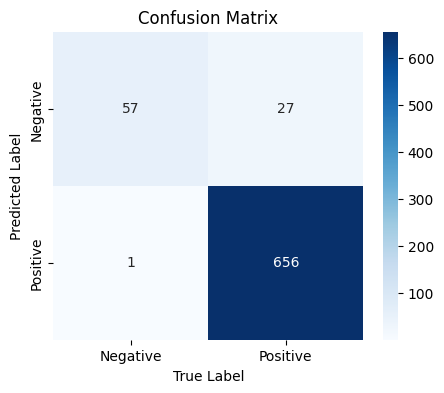


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80        58
           1       1.00      0.96      0.98       683

    accuracy                           0.96       741
   macro avg       0.84      0.97      0.89       741
weighted avg       0.97      0.96      0.97       741
 
FPR: 0.017 
G-Mean: 0.97

Fold 4:


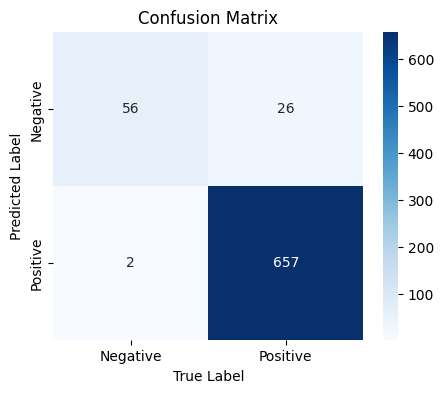


Fold 4 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        58
           1       1.00      0.96      0.98       683

    accuracy                           0.96       741
   macro avg       0.84      0.96      0.89       741
weighted avg       0.97      0.96      0.97       741
 
FPR: 0.034 
G-Mean: 0.96

Fold 5:


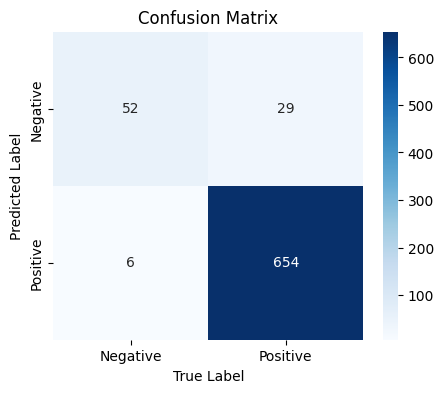


Fold 5 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        58
           1       0.99      0.96      0.97       683

    accuracy                           0.95       741
   macro avg       0.82      0.93      0.86       741
weighted avg       0.96      0.95      0.96       741
 
FPR: 0.1 
G-Mean: 0.93


In [ ]:
class FuzzySVM:
    def __init__(self, C, kernel, gamma):
        self.C = C
        self.kernel = kernel
        self.svm = SVC(C=self.C, kernel=self.kernel)

    def fit(self, X, y, fuzzy_membership):
        self.X = X
        self.y = y
        self.fuzzy_membership = fuzzy_membership
        # Weighted fitting
        sample_weights = self.C * self.fuzzy_membership
        self.svm.fit(self.X, self.y, sample_weight=sample_weights)

    def predict(self, X):
        return self.svm.predict(X)

    def score(self, X, y):
        return self.svm.score(X, y)

# Define fuzzy membership function based on distance from hyperplane
def fuzzy_membership(X, y):
    delta=0.000001
    beta=0.1
    initial_svm = SVC(kernel='rbf', gamma='scale')  # Initial SVM for distance calculation
    initial_svm.fit(X, y)
    distances = initial_svm.decision_function(X)
    # Normalize distances
    hyperplane_distances = np.abs(distances) / (np.max(np.abs(distances))+delta)

    # fuzzy_membership = 1-hyperplane_distances #Using linear function

    fuzzy_membership = 2/(1+np.exp(beta*distances))  # Example function using exponential decay

    # Calculate class ratios
    class_0 = np.sum(y == 0)
    class_1 = np.sum(y == 1)

    # Adjust for class imbalance
    class_0_ratio = 1
    class_1_ratio = class_0/class_1
    fuzzy_membership[y == 0] *= class_0_ratio
    fuzzy_membership[y == 1] *= class_1_ratio

    return fuzzy_membership

# Initialize the Fuzzy SVM model
fuzzy_svm = FuzzySVM(C=100, kernel='rbf', gamma='100')

# Initialize a StratifiedKFold for 5 splits/folds
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Placeholder for model accuracy scores
accuracy_scores = []
# Placeholder for model metrics
conf_matrices = []
classification_reports = []
fprs = []
gmeans = []
# Use a for loop and StratifiedKFold's split operation to
# get the train and test row indexes for each split
for i, (train_index, test_index) in enumerate(skf.split(x, y), 1):
    # Use these indexes to split the data into train and test dataframes
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    fuzzy_membership_fold = fuzzy_membership(x_train_fold.values,y_train_fold.values)

    # Train the Fuzzy SVM model
    fuzzy_svm.fit(x_train_fold, y_train_fold, fuzzy_membership_fold)

    # Predict on the test set
    y_pred = fuzzy_svm.predict(x_test_fold)

    # Evaluate the model
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    print(f'Fold {i} Accuracy: {accuracy:.2%}')

    conf_matrix = confusion_matrix(y_test_fold, y_pred)
    classification_rep = classification_report(y_test_fold, y_pred)
    conf_matrices.append(conf_matrix)
    classification_reports.append(classification_rep)
    # Calculate FPR manually from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()  # ravel() unpacks the confusion matrix values
    fpr = fp / (fp + tn)
    fprs.append(fpr)
    # Calculate G-Mean (Geometric Mean)
    gmean = geometric_mean_score(y_test_fold, y_pred)
    gmeans.append(gmean)
# Print average accuracy across all folds
Avg2=sum(accuracy_scores) / len(accuracy_scores)
print(f'\nAverage Accuracy: {Avg2:.2%}')

for i, (conf_matrix, classification_rep,fpr,gmean) in enumerate(zip(conf_matrices, classification_reports,fprs,gmeans), 1):
    print(f'\nFold {i}:')
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix.T, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative', 'Positive'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'\nFold {i} Classification Report:\n{classification_rep} \nFPR: {fpr:.2} \nG-Mean: {gmean:.2}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


# Initialize the SVM model
svm_model = SVC()

# Set the minimum number of features to keep
min_features = 5

# Initialize variables
current_n_features = x.shape[1]
accuracy_scores = []

# Initialize RandomizedSearchCV for hyperparameter tuning
param_distributions = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100]  # Fixed C values
}

random_search = RandomizedSearchCV(svm_model, param_distributions, n_iter=8, cv=5, random_state=42)

# Iterative RFE process
while current_n_features > min_features:
    # Fit RFE with the current features
    rfe = RFE(estimator=random_search, n_features_to_select=current_n_features, step=1)
    rfe.fit(x, y)

    # Get the ranks of features
    ranks = rfe.ranking_

    # Transform the dataset to keep only selected features
    X_rfe = rfe.transform(x)

    # Perform cross-validation for the selected features
    scores = cross_val_score(random_search, X_rfe, y, cv=5, scoring='accuracy')

    # Calculate the mean accuracy for this iteration
    mean_score = np.mean(scores)

    # Store the number of features and corresponding accuracy
    accuracy_scores.append((current_n_features, mean_score))

    print(f"Number of features: {current_n_features}, Accuracy: {mean_score:.4f}")

    # Find the indices of features to remove (those with the highest ranks)
    indices_to_remove = np.where(ranks > 1)[0]  # Indices of features to remove

    # Select features to remove
    n_remove = len(indices_to_remove)  # Number of features ranked > 1
    features_to_remove = indices_to_remove  # Remove all features with rank > 1

    # Update the current number of features by subtracting the number of features to remove
    current_n_features -= n_remove

    print(f"Features removed: {features_to_remove.tolist()}")  # Print which features are being removed

# Find the optimal number of features with the highest accuracy
optimal_features = max(accuracy_scores, key=lambda x: x[1])
print(f"\nOptimal number of features: {optimal_features[0]}, Accuracy: {optimal_features[1]:.4f}")